# Residual Plot

**Residual plot is actually the plot between actual target and predicted target.**

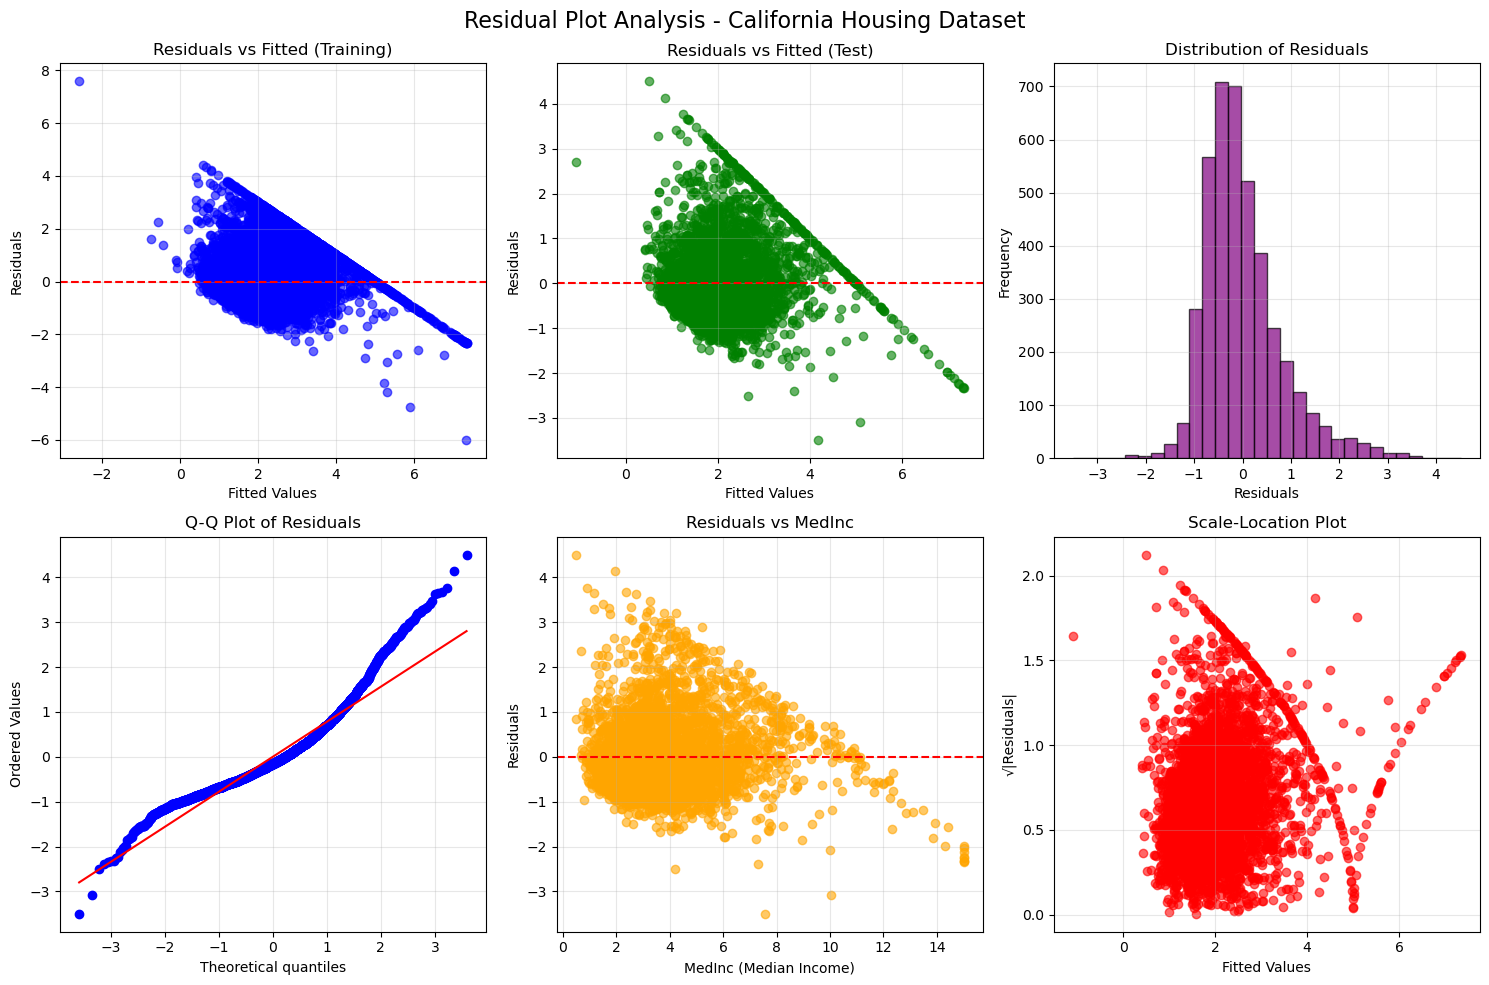

Model Performance:
Training R²: 0.5157
Test R²: 0.4972
Test RMSE: 0.8117

Model Coefficients:
MedInc: 0.4448
HouseAge: 0.0168
AveRooms: -0.0281
Intercept: 0.0173

RESIDUAL PLOT INTERPRETATION GUIDE:
1. RESIDUALS vs FITTED:
   - Good: Random scatter around y=0
   - Bad: Curved pattern (non-linearity), funnel shape (heteroscedasticity)

2. Q-Q PLOT:
   - Good: Points follow diagonal line closely
   - Bad: Systematic deviations suggest non-normal residuals

3. SCALE-LOCATION PLOT:
   - Good: Horizontal line with random scatter
   - Bad: Increasing/decreasing trend suggests changing variance

4. HISTOGRAM:
   - Good: Approximately normal distribution centered at 0
   - Bad: Skewed, bimodal, or heavy-tailed distributions


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the California housing dataset (Boston housing is deprecated)
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Use a subset of features for simplicity
feature_names = housing.feature_names
X_subset = X[:, [0, 1, 2]]  # MedInc, HouseAge, AveRooms
feature_subset_names = [feature_names[i] for i in [0, 1, 2]]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Create comprehensive residual plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Residual Plot Analysis - California Housing Dataset', fontsize=16)

# 1. Residuals vs Fitted Values (Training)
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Training)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals vs Fitted Values (Test)
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Fitted (Test)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of Residuals
axes[0, 2].hist(test_residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Residuals')
axes[0, 2].grid(True, alpha=0.3)

# 4. Q-Q Plot (Normal probability plot)
from scipy import stats
stats.probplot(test_residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 5. Residuals vs Individual Features
axes[1, 1].scatter(X_test[:, 0], test_residuals, alpha=0.6, color='orange')
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel(f'{feature_subset_names[0]} (Median Income)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residuals vs {feature_subset_names[0]}')
axes[1, 1].grid(True, alpha=0.3)

# 6. Scale-Location Plot (sqrt of abs residuals vs fitted)
sqrt_abs_residuals = np.sqrt(np.abs(test_residuals))
axes[1, 2].scatter(y_test_pred, sqrt_abs_residuals, alpha=0.6, color='red')
axes[1, 2].set_xlabel('Fitted Values')
axes[1, 2].set_ylabel('√|Residuals|')
axes[1, 2].set_title('Scale-Location Plot')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print model performance metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Model Performance:")
print(f"Training R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

print("\nModel Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"{feature_subset_names[i]}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Interpretation guide
print("\n" + "="*60)
print("RESIDUAL PLOT INTERPRETATION GUIDE:")
print("="*60)
print("1. RESIDUALS vs FITTED:")
print("   - Good: Random scatter around y=0")
print("   - Bad: Curved pattern (non-linearity), funnel shape (heteroscedasticity)")
print()
print("2. Q-Q PLOT:")
print("   - Good: Points follow diagonal line closely")
print("   - Bad: Systematic deviations suggest non-normal residuals")
print()
print("3. SCALE-LOCATION PLOT:")
print("   - Good: Horizontal line with random scatter")
print("   - Bad: Increasing/decreasing trend suggests changing variance")
print()
print("4. HISTOGRAM:")
print("   - Good: Approximately normal distribution centered at 0")
print("   - Bad: Skewed, bimodal, or heavy-tailed distributions")

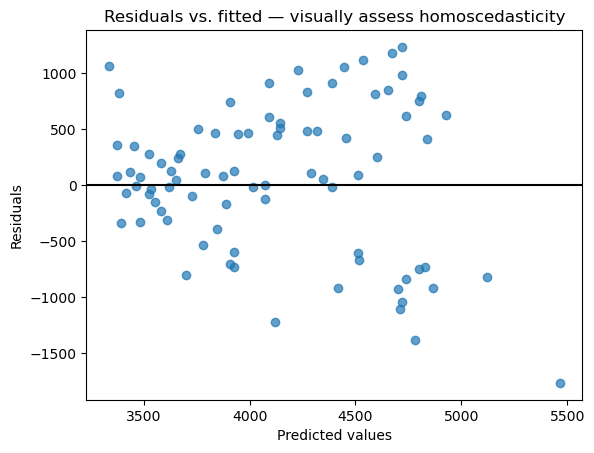

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns  # only for the sample dataset

# Example dataset (Boston housing removed in 1.2; use Cali Housing or synthetic)
X, y = sns.load_dataset("penguins").dropna()[["bill_length_mm"]], sns.load_dataset("penguins").dropna()["body_mass_g"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred  = model.predict(X_test)
resid   = y_test - y_pred

plt.scatter(y_pred, resid, alpha=0.7)
plt.axhline(0, color="black")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. fitted — visually assess homoscedasticity")
plt.show()

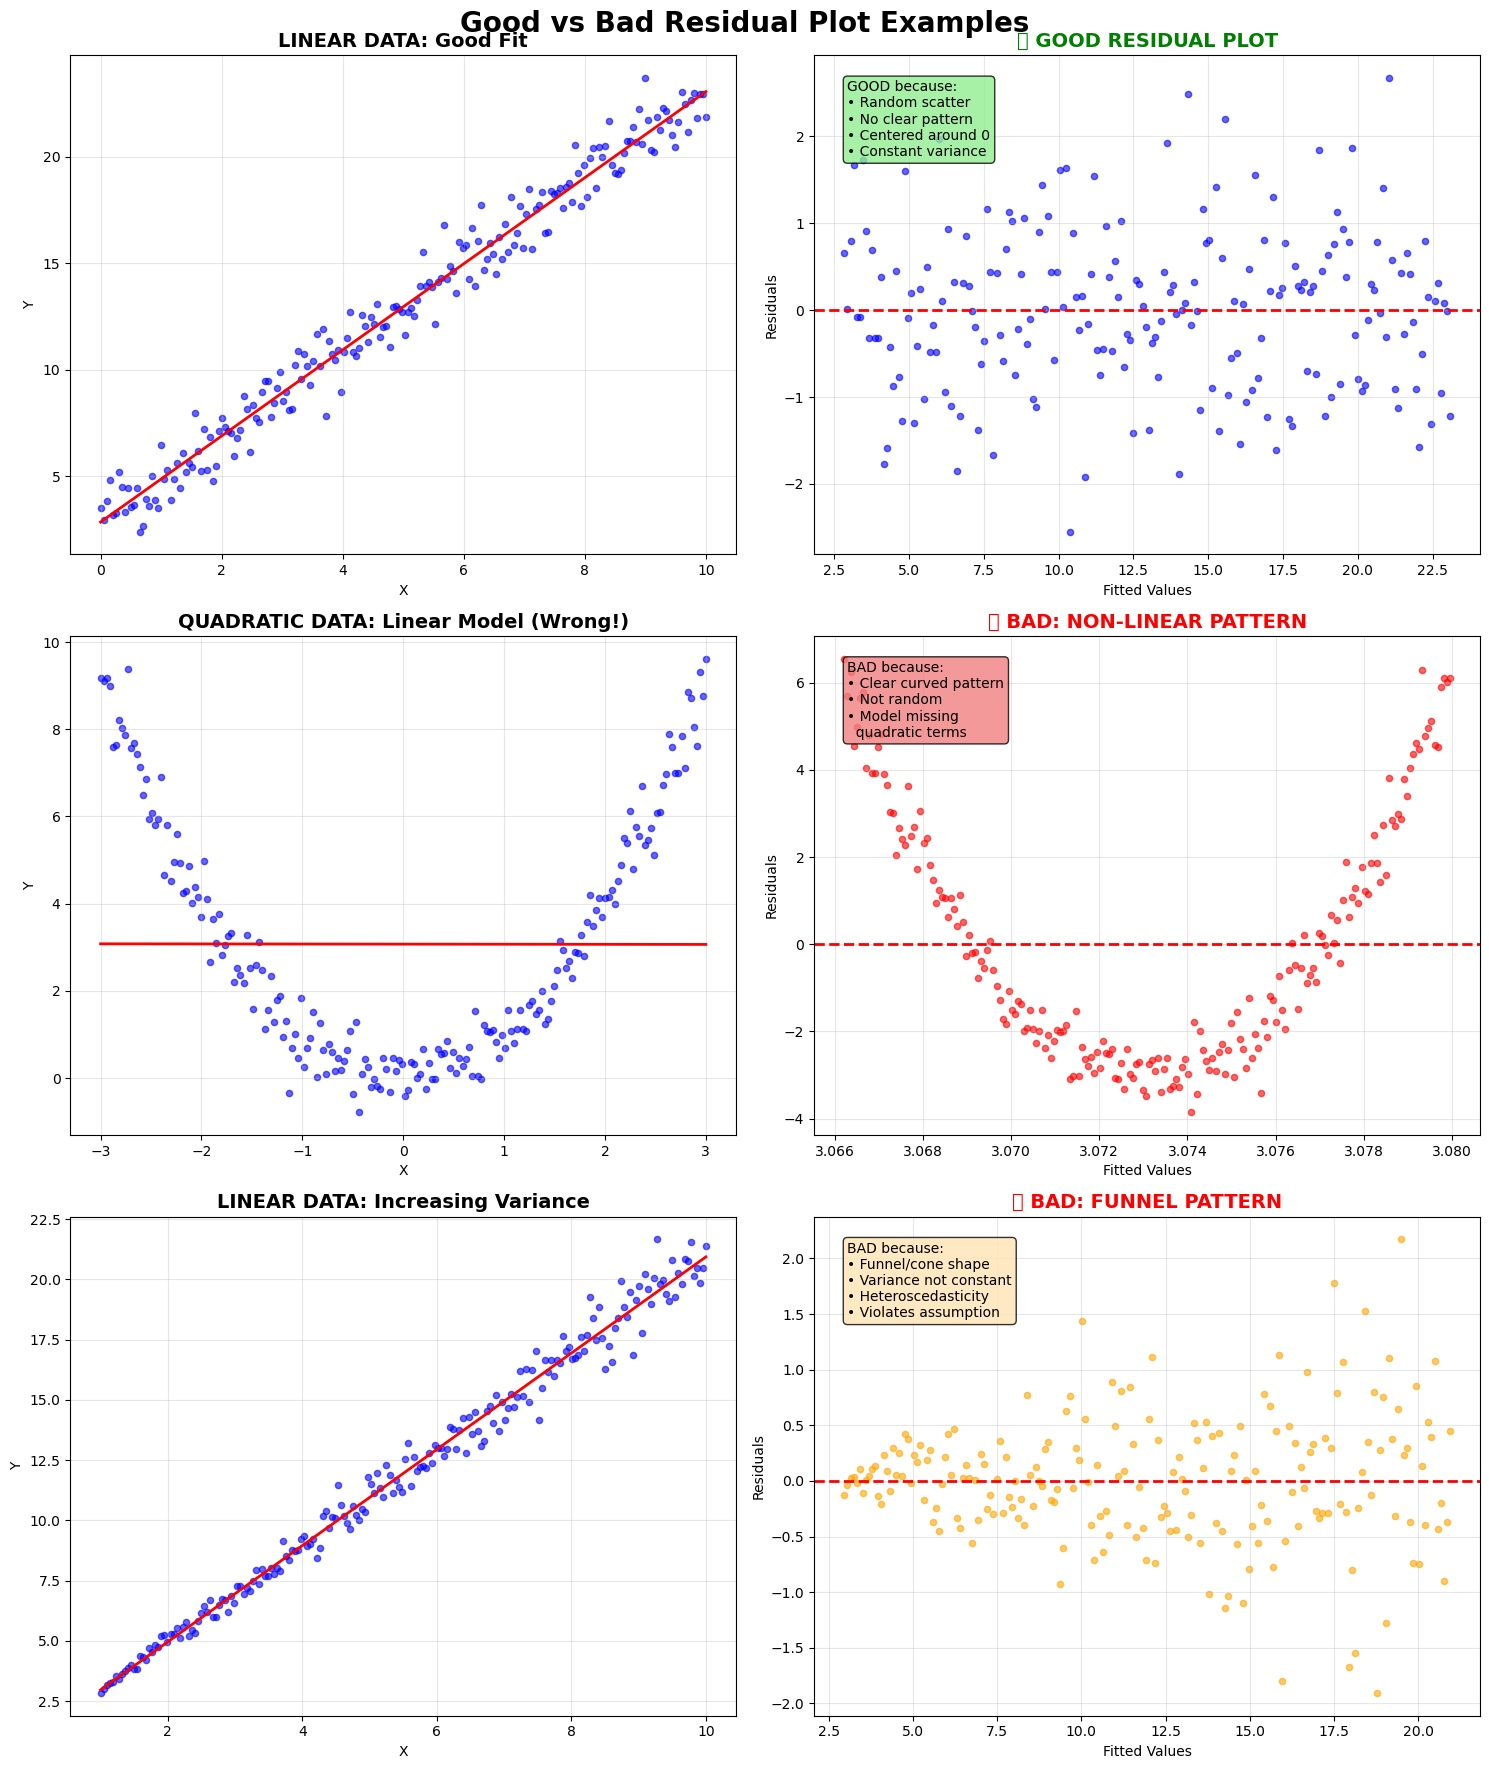

RESIDUAL PLOT DIAGNOSIS SUMMARY

🟢 GOOD RESIDUAL PLOT CHARACTERISTICS:
   • Points scattered randomly around the horizontal line at y=0
   • No clear patterns, trends, or curves
   • Constant spread (variance) across all fitted values
   • Roughly equal number of points above and below zero

🔴 BAD RESIDUAL PLOT PATTERNS:
   1. CURVED PATTERN:
      → Solution: Add polynomial terms or transform variables
   2. FUNNEL/CONE PATTERN:
      → Solution: Transform response variable (log, sqrt) or use weighted regression
   3. INCREASING/DECREASING SPREAD:
      → Solution: Transform variables or use robust regression
   4. OUTLIERS OR CLUSTERS:
      → Solution: Investigate data quality or use robust methods

💡 QUICK DECISION RULES:
   • If you can draw a smooth curve through the residuals → BAD
   • If the spread changes as you move left to right → BAD
   • If it looks like random static noise around zero → GOOD

📊 DIAGNOSTIC STATISTICS:
   Good model (linear data):     R² = 0.976
   Bad mod

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Good vs Bad Residual Plot Examples', fontsize=20, fontweight='bold')

# ============================================================================
# EXAMPLE 1: GOOD RESIDUAL PLOT (Linear relationship fits well)
# ============================================================================

# Generate linear data with some noise
X1 = np.linspace(0, 10, 200).reshape(-1, 1)
y1 = 2 * X1.ravel() + 3 + np.random.normal(0, 1, 200)  # y = 2x + 3 + noise

# Fit linear model
model1 = LinearRegression()
model1.fit(X1, y1)
y1_pred = model1.predict(X1)
residuals1 = y1 - y1_pred

# Plot data and fitted line
axes[0, 0].scatter(X1, y1, alpha=0.6, color='blue', s=20)
axes[0, 0].plot(X1, y1_pred, color='red', linewidth=2)
axes[0, 0].set_title('LINEAR DATA: Good Fit', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].grid(True, alpha=0.3)

# Plot residuals
axes[0, 1].scatter(y1_pred, residuals1, alpha=0.6, color='blue', s=20)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('✅ GOOD RESIDUAL PLOT', fontsize=14, fontweight='bold', color='green')
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].grid(True, alpha=0.3)

# Add explanation text
axes[0, 1].text(0.05, 0.95, 'GOOD because:\n• Random scatter\n• No clear pattern\n• Centered around 0\n• Constant variance', 
                transform=axes[0, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# ============================================================================
# EXAMPLE 2: BAD RESIDUAL PLOT - NON-LINEAR PATTERN
# ============================================================================

# Generate quadratic data but fit linear model
X2 = np.linspace(-3, 3, 200).reshape(-1, 1)
y2 = X2.ravel()**2 + np.random.normal(0, 0.5, 200)  # Quadratic relationship

# Fit linear model (wrong model!)
model2 = LinearRegression()
model2.fit(X2, y2)
y2_pred = model2.predict(X2)
residuals2 = y2 - y2_pred

# Plot data and wrong fitted line
axes[1, 0].scatter(X2, y2, alpha=0.6, color='blue', s=20)
axes[1, 0].plot(X2, y2_pred, color='red', linewidth=2)
axes[1, 0].set_title('QUADRATIC DATA: Linear Model (Wrong!)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].grid(True, alpha=0.3)

# Plot residuals - will show curved pattern
axes[1, 1].scatter(y2_pred, residuals2, alpha=0.6, color='red', s=20)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_title('❌ BAD: NON-LINEAR PATTERN', fontsize=14, fontweight='bold', color='red')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

# Add explanation text
axes[1, 1].text(0.05, 0.95, 'BAD because:\n• Clear curved pattern\n• Not random\n• Model missing\n  quadratic terms', 
                transform=axes[1, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# ============================================================================
# EXAMPLE 3: BAD RESIDUAL PLOT - HETEROSCEDASTICITY (Funnel Pattern)
# ============================================================================

# Generate data with increasing variance
X3 = np.linspace(1, 10, 200).reshape(-1, 1)
# Variance increases with X (heteroscedasticity)
noise_std = 0.1 * X3.ravel()  # Standard deviation increases with X
y3 = 2 * X3.ravel() + 1 + np.random.normal(0, noise_std)

# Fit linear model
model3 = LinearRegression()
model3.fit(X3, y3)
y3_pred = model3.predict(X3)
residuals3 = y3 - y3_pred

# Plot data and fitted line
axes[2, 0].scatter(X3, y3, alpha=0.6, color='blue', s=20)
axes[2, 0].plot(X3, y3_pred, color='red', linewidth=2)
axes[2, 0].set_title('LINEAR DATA: Increasing Variance', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('X')
axes[2, 0].set_ylabel('Y')
axes[2, 0].grid(True, alpha=0.3)

# Plot residuals - will show funnel pattern
axes[2, 1].scatter(y3_pred, residuals3, alpha=0.6, color='orange', s=20)
axes[2, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2, 1].set_title('❌ BAD: FUNNEL PATTERN', fontsize=14, fontweight='bold', color='red')
axes[2, 1].set_xlabel('Fitted Values')
axes[2, 1].set_ylabel('Residuals')
axes[2, 1].grid(True, alpha=0.3)

# Add explanation text
axes[2, 1].text(0.05, 0.95, 'BAD because:\n• Funnel/cone shape\n• Variance not constant\n• Heteroscedasticity\n• Violates assumption', 
                transform=axes[2, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='moccasin', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY TABLE
# ============================================================================

print("="*80)
print("RESIDUAL PLOT DIAGNOSIS SUMMARY")
print("="*80)

print("\n🟢 GOOD RESIDUAL PLOT CHARACTERISTICS:")
print("   • Points scattered randomly around the horizontal line at y=0")
print("   • No clear patterns, trends, or curves")
print("   • Constant spread (variance) across all fitted values")
print("   • Roughly equal number of points above and below zero")

print("\n🔴 BAD RESIDUAL PLOT PATTERNS:")
print("   1. CURVED PATTERN:")
print("      → Solution: Add polynomial terms or transform variables")
print("   2. FUNNEL/CONE PATTERN:")
print("      → Solution: Transform response variable (log, sqrt) or use weighted regression")
print("   3. INCREASING/DECREASING SPREAD:")
print("      → Solution: Transform variables or use robust regression")
print("   4. OUTLIERS OR CLUSTERS:")
print("      → Solution: Investigate data quality or use robust methods")

print("\n💡 QUICK DECISION RULES:")
print("   • If you can draw a smooth curve through the residuals → BAD")
print("   • If the spread changes as you move left to right → BAD") 
print("   • If it looks like random static noise around zero → GOOD")

# Calculate some diagnostic statistics
print(f"\n📊 DIAGNOSTIC STATISTICS:")
print(f"   Good model (linear data):     R² = {model1.score(X1, y1):.3f}")
print(f"   Bad model (wrong for quad):   R² = {model2.score(X2, y2):.3f}")
print(f"   Heteroscedastic model:        R² = {model3.score(X3, y3):.3f}")

# Skewness

Distribution Analysis: Normal vs Skewed Distributions
Sample size: 1000
Normal Distribution - Mean: 50.29, Std: 14.68
Skewed Distribution - Mean: 38.81, Std: 20.34
Normal Distribution - Skewness: 0.117
Skewed Distribution - Skewness: 1.573


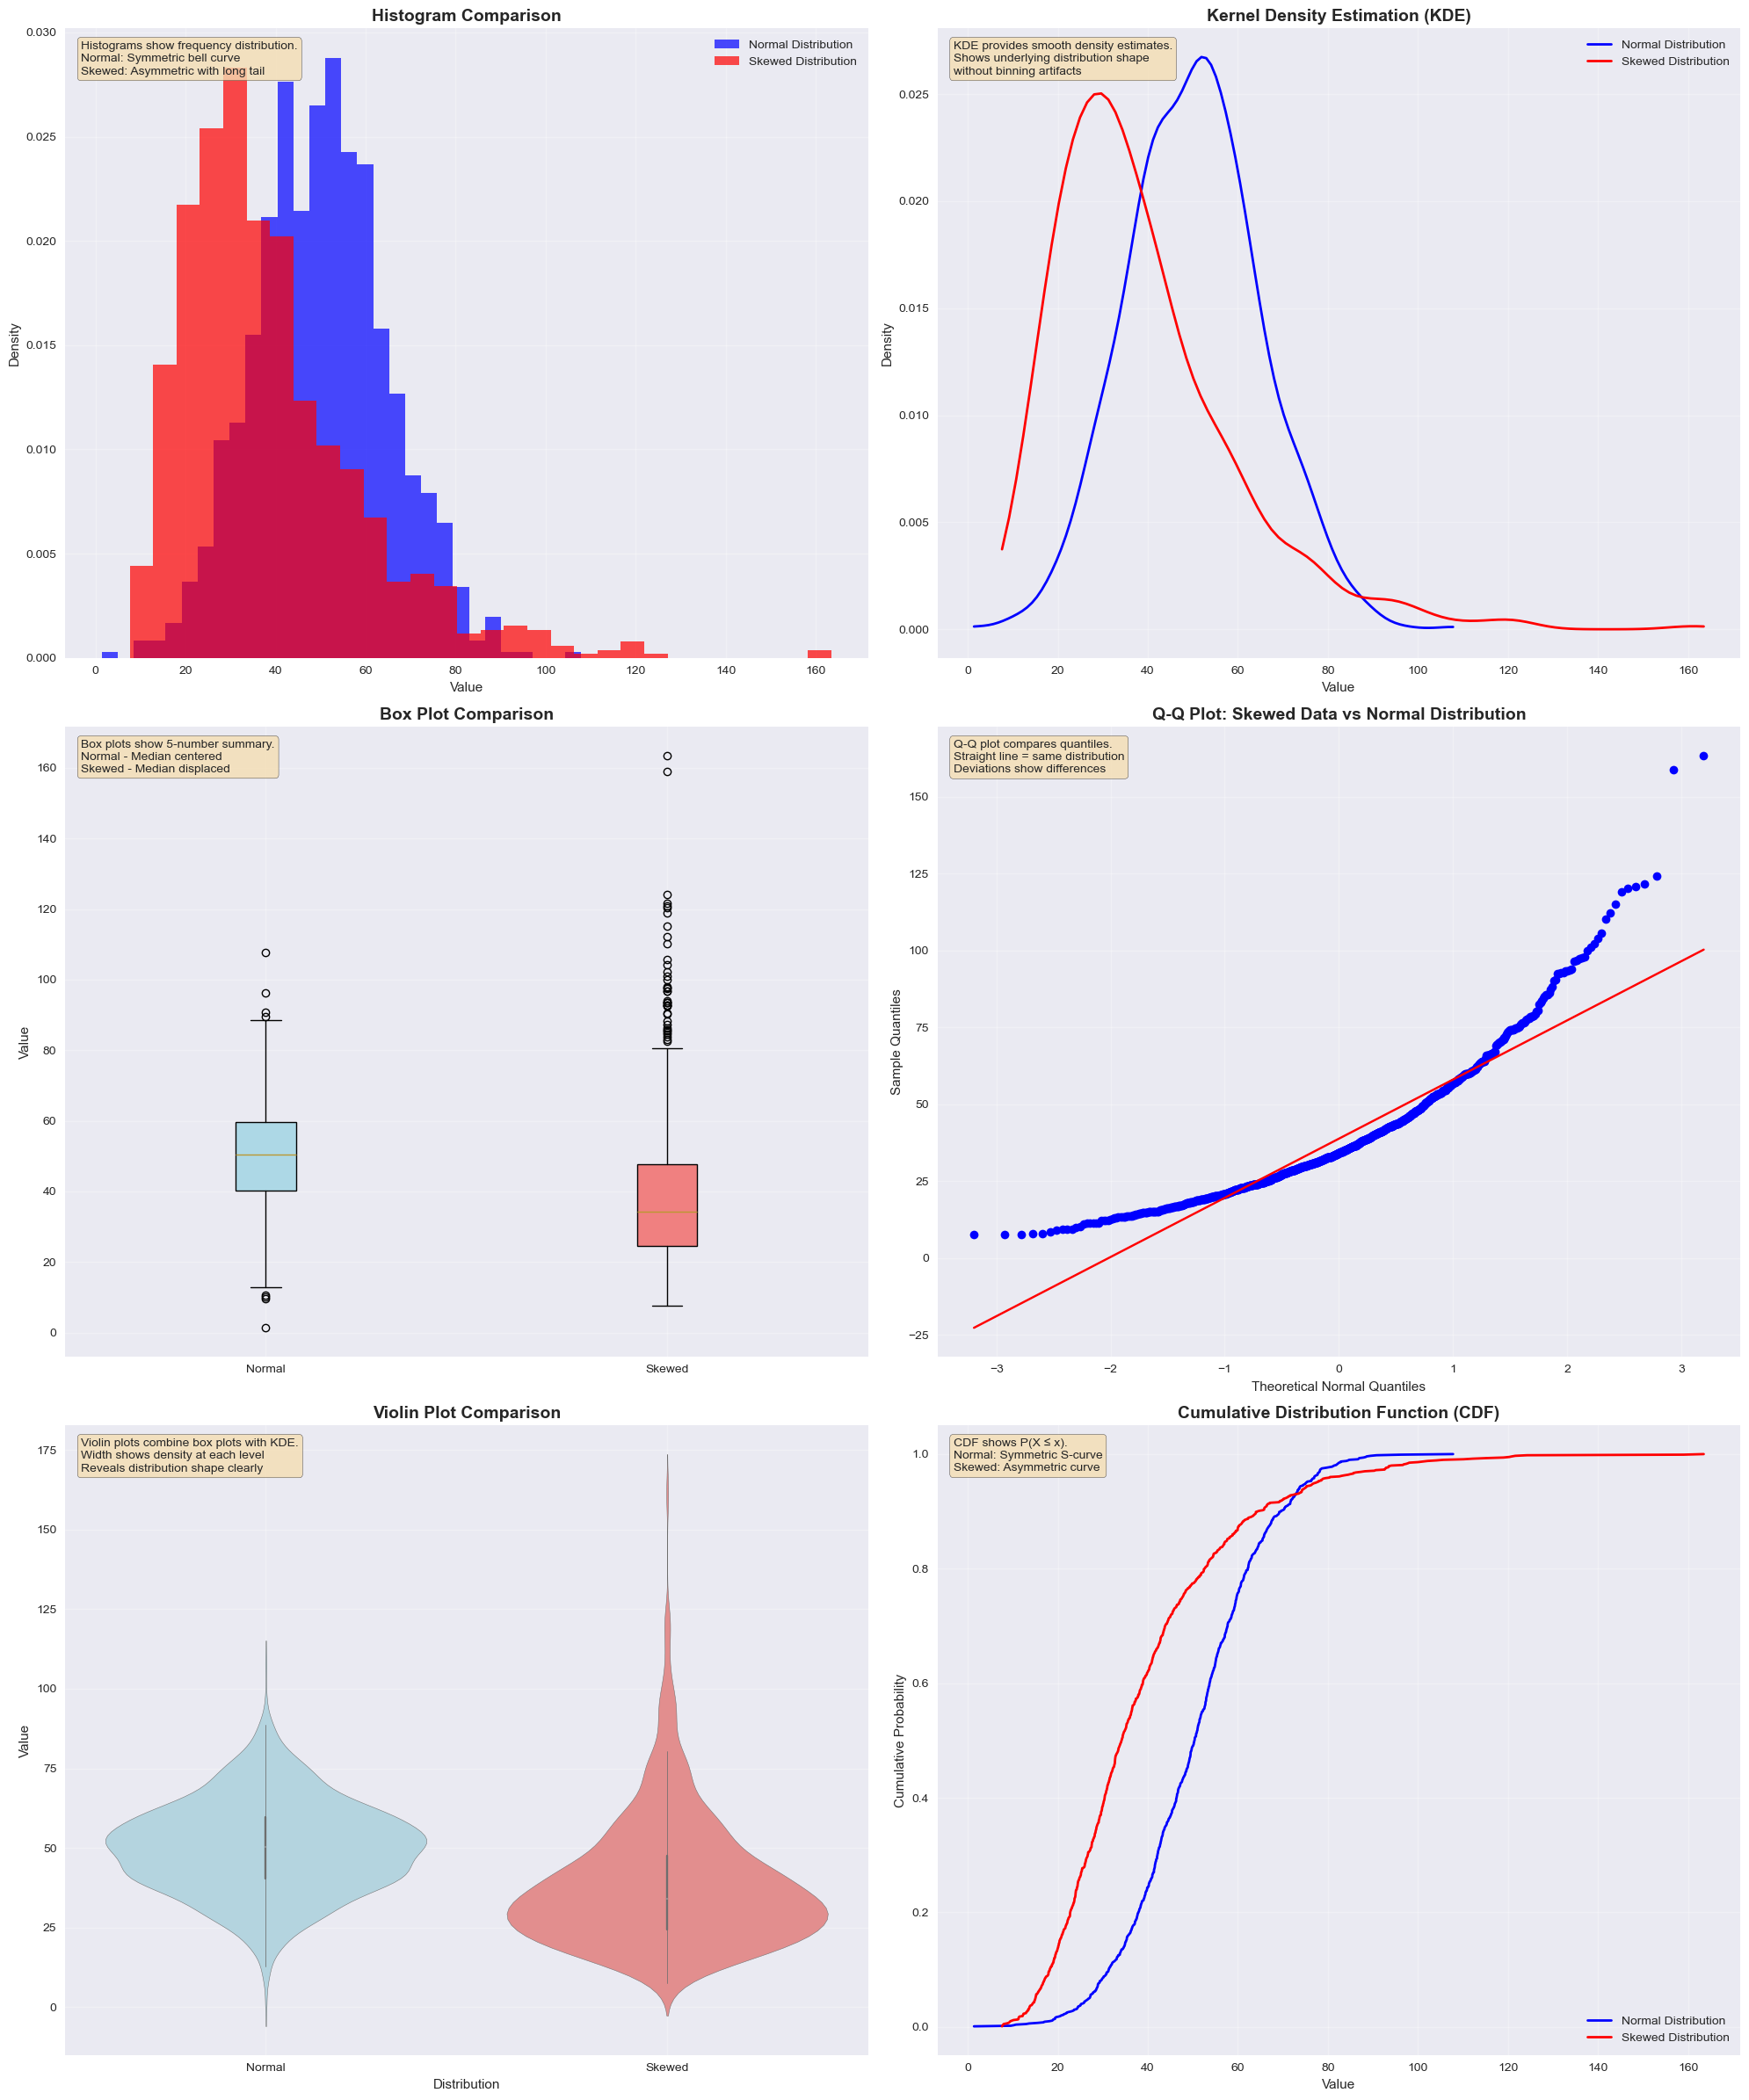


SUMMARY STATISTICS COMPARISON
  Distribution    Mean  Median   Mode  Std Dev  Variance  Skewness  Kurtosis  \
0       Normal  50.290  50.380  1.381   14.681   215.529     0.117     0.066   
1       Skewed  38.812  34.177  7.613   20.340   413.709     1.573     4.004   

     Min      Max      Q1      Q3     IQR  
0  1.381  107.791  40.286  59.719  19.433  
1  7.613  163.458  24.456  47.677  23.221  

KEY DIFFERENCES ANALYSIS
1. SHAPE CHARACTERISTICS:
   Normal Distribution:
   - Symmetric (Skewness ≈ 0): 0.117
   - Bell-shaped curve
   - Mean ≈ Median ≈ Mode
   - Equal tails

   Skewed Distribution:
   - Right-skewed (Skewness > 0): 1.573
   - Long right tail
   - Mean > Median > Mode
   - Unequal tails

2. CENTRAL TENDENCY:
   Normal: Mean=50.29, Median=50.38
   Skewed: Mean=38.81, Median=34.18
   In skewed distributions, mean is pulled toward the tail

3. VARIABILITY:
   Normal: Std Dev = 14.68
   Skewed: Std Dev = 20.34
   Skewed distributions often have higher variability

4. WHAT

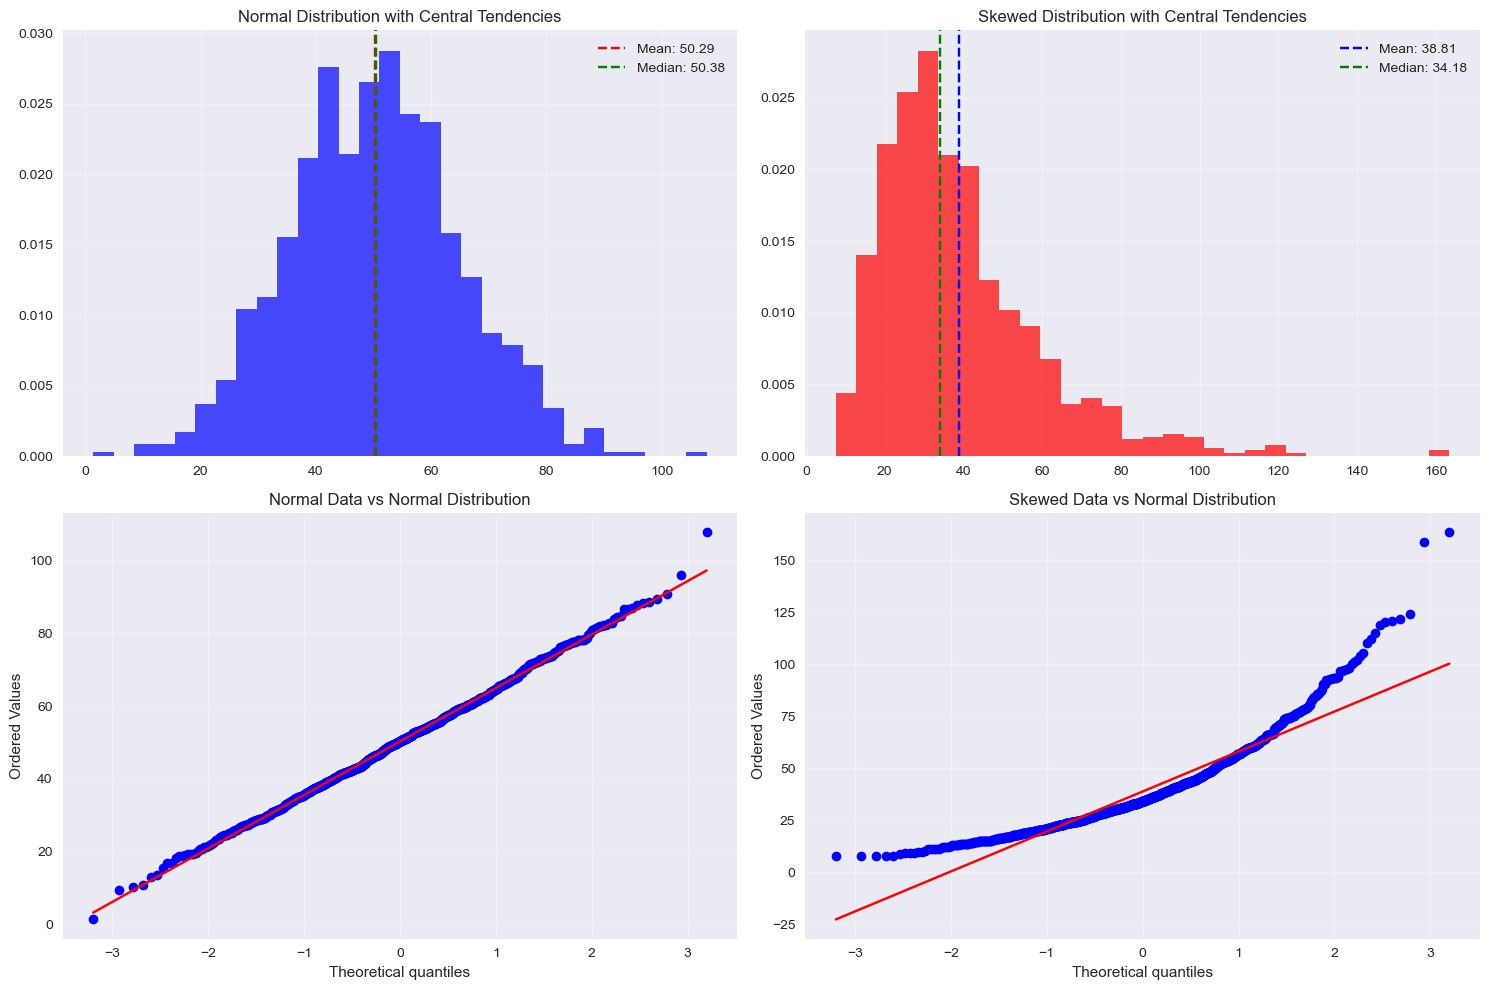


STATISTICAL TESTS
Shapiro-Wilk Test for Normality:
Normal Data: W-statistic = 0.998609, p-value = 6.27e-01
Skewed Data: W-statistic = 0.890508, p-value = 4.93e-26
p-value < 0.05 suggests data is NOT normally distributed

Anderson-Darling Test:
Normal Data: A² = 0.347470
Skewed Data: A² = 24.335279
Higher A² values suggest greater deviation from normality

PRACTICAL IMPLICATIONS
1. For NORMAL distributions:
   - Use mean as measure of central tendency
   - Standard deviation is meaningful
   - 68-95-99.7 rule applies
   - Many statistical tests assume normality

2. For SKEWED distributions:
   - Use median as measure of central tendency
   - Consider data transformation
   - Be careful with parametric tests
   - May need non-parametric alternatives

3. Choosing the right visualization:
   - Histogram: Quick overview of distribution shape
   - KDE: Smooth density estimation
   - Box plot: Compare multiple groups, identify outliers
   - Q-Q plot: Test specific distributional assumptions


In [7]:
# Distribution Analysis: Normal vs Skewed
# A comprehensive comparison using various visualization techniques

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Distribution Analysis: Normal vs Skewed Distributions")
print("=" * 60)

# Generate sample data
n_samples = 1000

# Normal distribution
normal_data = np.random.normal(loc=50, scale=15, size=n_samples)

# Skewed distribution (log-normal)
skewed_data = np.random.lognormal(mean=3.5, sigma=0.5, size=n_samples)

print(f"Sample size: {n_samples}")
print(f"Normal Distribution - Mean: {normal_data.mean():.2f}, Std: {normal_data.std():.2f}")
print(f"Skewed Distribution - Mean: {skewed_data.mean():.2f}, Std: {skewed_data.std():.2f}")
print(f"Normal Distribution - Skewness: {stats.skew(normal_data):.3f}")
print(f"Skewed Distribution - Skewness: {stats.skew(skewed_data):.3f}")

# Create a comprehensive figure with all plot types
fig = plt.figure(figsize=(20, 24))

# 1. HISTOGRAM
plt.subplot(3, 2, 1)
plt.hist(normal_data, bins=30, alpha=0.7, color='blue', label='Normal Distribution', density=True)
plt.hist(skewed_data, bins=30, alpha=0.7, color='red', label='Skewed Distribution', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text explanation
plt.text(0.02, 0.98, 'Histograms show frequency distribution.\nNormal: Symmetric bell curve\nSkewed: Asymmetric with long tail', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 2. KDE PLOT
plt.subplot(3, 2, 2)
x_normal = np.linspace(normal_data.min(), normal_data.max(), 100)
x_skewed = np.linspace(skewed_data.min(), skewed_data.max(), 100)

# Calculate KDE
kde_normal = stats.gaussian_kde(normal_data)
kde_skewed = stats.gaussian_kde(skewed_data)

plt.plot(x_normal, kde_normal(x_normal), 'b-', linewidth=2, label='Normal Distribution')
plt.plot(x_skewed, kde_skewed(x_skewed), 'r-', linewidth=2, label='Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.text(0.02, 0.98, 'KDE provides smooth density estimates.\nShows underlying distribution shape\nwithout binning artifacts', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. BOX PLOT
plt.subplot(3, 2, 3)
data_for_boxplot = [normal_data, skewed_data]
labels = ['Normal', 'Skewed']
box_plot = plt.boxplot(data_for_boxplot, labels=labels, patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Value')
plt.title('Box Plot Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Calculate statistics for annotation
normal_stats = {
    'Q1': np.percentile(normal_data, 25),
    'Median': np.percentile(normal_data, 50),
    'Q3': np.percentile(normal_data, 75),
    'IQR': np.percentile(normal_data, 75) - np.percentile(normal_data, 25)
}

skewed_stats = {
    'Q1': np.percentile(skewed_data, 25),
    'Median': np.percentile(skewed_data, 50),
    'Q3': np.percentile(skewed_data, 75),
    'IQR': np.percentile(skewed_data, 75) - np.percentile(skewed_data, 25)
}

plt.text(0.02, 0.98, f'Box plots show 5-number summary.\nNormal - Median centered\nSkewed - Median displaced', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 4. Q-Q PLOT
plt.subplot(3, 2, 4)
# Q-Q plot comparing skewed data against normal distribution
probplot(skewed_data, dist="norm", plot=plt)
plt.title('Q-Q Plot: Skewed Data vs Normal Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Normal Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, alpha=0.3)

plt.text(0.02, 0.98, 'Q-Q plot compares quantiles.\nStraight line = same distribution\nDeviations show differences', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 5. VIOLIN PLOT
plt.subplot(3, 2, 5)
violin_data = pd.DataFrame({
    'Normal': normal_data,
    'Skewed': skewed_data
})

# Reshape for violin plot
violin_melted = pd.melt(violin_data, var_name='Distribution', value_name='Value')
sns.violinplot(data=violin_melted, x='Distribution', y='Value', palette=['lightblue', 'lightcoral'])
plt.title('Violin Plot Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.text(0.02, 0.98, 'Violin plots combine box plots with KDE.\nWidth shows density at each level\nReveals distribution shape clearly', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 6. CDF PLOT
plt.subplot(3, 2, 6)
# Calculate empirical CDF
sorted_normal = np.sort(normal_data)
sorted_skewed = np.sort(skewed_data)

y_normal = np.arange(1, len(sorted_normal) + 1) / len(sorted_normal)
y_skewed = np.arange(1, len(sorted_skewed) + 1) / len(sorted_skewed)

plt.plot(sorted_normal, y_normal, 'b-', linewidth=2, label='Normal Distribution')
plt.plot(sorted_skewed, y_skewed, 'r-', linewidth=2, label='Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.text(0.02, 0.98, 'CDF shows P(X ≤ x).\nNormal: Symmetric S-curve\nSkewed: Asymmetric curve', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Summary statistics comparison
print("\n" + "="*60)
print("SUMMARY STATISTICS COMPARISON")
print("="*60)

def calculate_stats(data, name):
    return {
        'Distribution': name,
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Mode': stats.mode(data, keepdims=True)[0][0],
        'Std Dev': np.std(data),
        'Variance': np.var(data),
        'Skewness': stats.skew(data),
        'Kurtosis': stats.kurtosis(data),
        'Min': np.min(data),
        'Max': np.max(data),
        'Q1': np.percentile(data, 25),
        'Q3': np.percentile(data, 75),
        'IQR': np.percentile(data, 75) - np.percentile(data, 25)
    }

normal_stats = calculate_stats(normal_data, 'Normal')
skewed_stats = calculate_stats(skewed_data, 'Skewed')

stats_df = pd.DataFrame([normal_stats, skewed_stats])
print(stats_df.round(3))

# Additional analysis
print("\n" + "="*60)
print("KEY DIFFERENCES ANALYSIS")
print("="*60)

print("1. SHAPE CHARACTERISTICS:")
print(f"   Normal Distribution:")
print(f"   - Symmetric (Skewness ≈ 0): {stats.skew(normal_data):.3f}")
print(f"   - Bell-shaped curve")
print(f"   - Mean ≈ Median ≈ Mode")
print(f"   - Equal tails")

print(f"\n   Skewed Distribution:")
print(f"   - Right-skewed (Skewness > 0): {stats.skew(skewed_data):.3f}")
print(f"   - Long right tail")
print(f"   - Mean > Median > Mode")
print(f"   - Unequal tails")

print("\n2. CENTRAL TENDENCY:")
print(f"   Normal: Mean={normal_data.mean():.2f}, Median={np.median(normal_data):.2f}")
print(f"   Skewed: Mean={skewed_data.mean():.2f}, Median={np.median(skewed_data):.2f}")
print(f"   In skewed distributions, mean is pulled toward the tail")

print("\n3. VARIABILITY:")
print(f"   Normal: Std Dev = {normal_data.std():.2f}")
print(f"   Skewed: Std Dev = {skewed_data.std():.2f}")
print(f"   Skewed distributions often have higher variability")

print("\n4. WHAT EACH PLOT REVEALS:")
print("   Histogram: Overall shape and frequency distribution")
print("   KDE: Smooth density curve without binning artifacts")
print("   Box Plot: Quartiles, outliers, and symmetry")
print("   Q-Q Plot: Deviations from normality")
print("   Violin Plot: Combines quartile info with density")
print("   CDF: Cumulative probabilities and percentiles")

# Create a separate figure for detailed statistical tests
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Normality tests visualization
ax1.hist(normal_data, bins=30, alpha=0.7, density=True, color='blue')
ax1.axvline(normal_data.mean(), color='red', linestyle='--', label=f'Mean: {normal_data.mean():.2f}')
ax1.axvline(np.median(normal_data), color='green', linestyle='--', label=f'Median: {np.median(normal_data):.2f}')
ax1.set_title('Normal Distribution with Central Tendencies')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(skewed_data, bins=30, alpha=0.7, density=True, color='red')
ax2.axvline(skewed_data.mean(), color='blue', linestyle='--', label=f'Mean: {skewed_data.mean():.2f}')
ax2.axvline(np.median(skewed_data), color='green', linestyle='--', label=f'Median: {np.median(skewed_data):.2f}')
ax2.set_title('Skewed Distribution with Central Tendencies')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Probability plots
probplot(normal_data, dist="norm", plot=ax3)
ax3.set_title('Normal Data vs Normal Distribution')
ax3.grid(True, alpha=0.3)

probplot(skewed_data, dist="norm", plot=ax4)
ax4.set_title('Skewed Data vs Normal Distribution')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Perform statistical tests
print("\n" + "="*60)
print("STATISTICAL TESTS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_normal = stats.shapiro(normal_data[:5000])  # Limit sample size for test
shapiro_skewed = stats.shapiro(skewed_data[:5000])

print("Shapiro-Wilk Test for Normality:")
print(f"Normal Data: W-statistic = {shapiro_normal[0]:.6f}, p-value = {shapiro_normal[1]:.2e}")
print(f"Skewed Data: W-statistic = {shapiro_skewed[0]:.6f}, p-value = {shapiro_skewed[1]:.2e}")
print("p-value < 0.05 suggests data is NOT normally distributed")

# Anderson-Darling test
anderson_normal = stats.anderson(normal_data, dist='norm')
anderson_skewed = stats.anderson(skewed_data, dist='norm')

print(f"\nAnderson-Darling Test:")
print(f"Normal Data: A² = {anderson_normal.statistic:.6f}")
print(f"Skewed Data: A² = {anderson_skewed.statistic:.6f}")
print("Higher A² values suggest greater deviation from normality")

print("\n" + "="*60)
print("PRACTICAL IMPLICATIONS")
print("="*60)
print("1. For NORMAL distributions:")
print("   - Use mean as measure of central tendency")
print("   - Standard deviation is meaningful")
print("   - 68-95-99.7 rule applies")
print("   - Many statistical tests assume normality")

print("\n2. For SKEWED distributions:")
print("   - Use median as measure of central tendency")
print("   - Consider data transformation")
print("   - Be careful with parametric tests")
print("   - May need non-parametric alternatives")

print("\n3. Choosing the right visualization:")
print("   - Histogram: Quick overview of distribution shape")
print("   - KDE: Smooth density estimation")
print("   - Box plot: Compare multiple groups, identify outliers")
print("   - Q-Q plot: Test specific distributional assumptions")
print("   - Violin plot: Detailed shape with summary statistics")
print("   - CDF plot: Understand cumulative probabilities")

### Moment-based coefficients
**Population moment skewness**
$$\gamma_1 = \frac{\mu_3}{\sigma^{3}}
          = \frac{\operatorname{E}[(X-\mu)^3]}{(\operatorname{Var}(X))^{3/2}}$$

**Sample moment (uncorrected) skewness**
$$g_1 = \frac{\frac{1}{n}\sum\limits_{i=1}^{n}(x_i-\bar{x})^{3}}
          {\left(\frac{1}{n}\sum\limits_{i=1}^{n}(x_i-\bar{x})^{2}\right)^{3/2}}$$

**Sample moment (bias-corrected) skewness (“Fisher–Pearson”)**
$$G_1 = \frac{n}{(n-1)(n-2)}\,
      \sum\limits_{i=1}^{n}\frac{(x_i-\bar{x})^{3}}{s^{3}}, \qquad
      s^{2} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^{2}$$

**Weighted sample skewness**
$$g_{1,w} = \frac{\sum_{i} w_i (x_i-\mu_w)^3}
               {\left(\sum_{i} w_i\right)\,s_w^{3}}, \qquad
          \mu_w = \frac{\sum_{i} w_i x_i}{\sum_{i} w_i}, \qquad
          s_w^{2} = \frac{\sum_{i} w_i (x_i-\mu_w)^2}{\sum_{i} w_i}$$

### Percentile / order-statistic coefficients

**Pearson’s first coefficient**
$$\text{Sk}_{\text{P1}} = \frac{\bar{x} - \text{mode}}{s}$$

**Pearson’s second coefficient**
$$\text{Sk}_{\text{P2}} = \frac{3(\bar{x} - \text{median})}{s}$$

**Bowley (quartile) skewness**
$$\text{Sk}_{\text{B}}  = \frac{Q_3 + Q_1 - 2Q_2}{Q_3 - Q_1}
                      = \frac{Q_3 - 2Q_2 + Q_1}{Q_3 - Q_1}$$

**Kelly (decile) skewness**
$$\text{Sk}_{\text{K}}  = \frac{P_{90} + P_{10} - 2P_{50}}{P_{90} - P_{10}}
$$